# Goal: to predict the sales price for each house. For each Id in the test set, predict the value of the SalePrice

# 1.1 import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

# ML models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# metrics to evaluate regression model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1.2 Load datasets

In [3]:
train_df=pd.read_csv('train.csv') # contains features and target variable (SalePrice)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
target=train_df[['Id','SalePrice']] # target features is sliced from train.csv
target.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [8]:
train_df1=pd.read_csv('EDA_train_df1.csv') # EDA completed file from train.csv
train_df1=train_df1.iloc[:,1:] 
train_df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
full_df1=pd.read_csv('EDA_full_df1.csv') # EDA completed file from combined dataset: train.csv, test.csv
full_df1=full_df1.iloc[:,1:]
full_df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


# 4. Preprocessing
## 4.1 check distribution of target variable

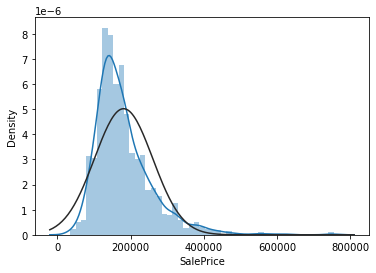

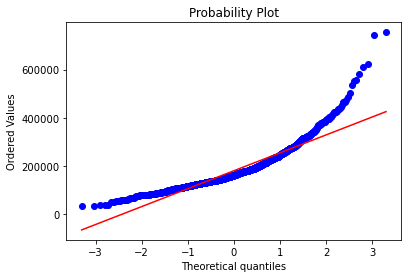

In [11]:
# histogram and probability plot of target variable
sns.distplot(target['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(target['SalePrice'], plot=plt)

## SalePrice is not normally distributed, and had positive skewness. So, apply log transformation

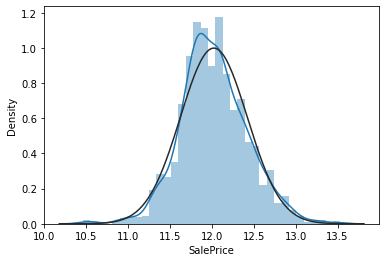

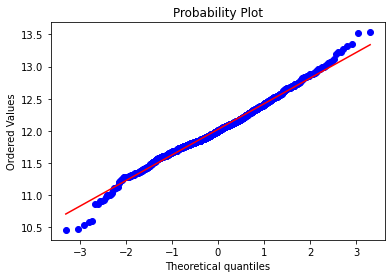

In [12]:
# apply log transformation to target variable to make normally distributed
target['SalePrice']=np.log(target['SalePrice'])

# check if log transformation improved histogram and prob distribution
sns.distplot(target['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(target['SalePrice'], plot=plt)

## Yes, target variable is normally distributed........

## Similarly, check distribution of SalePrice from train_df1

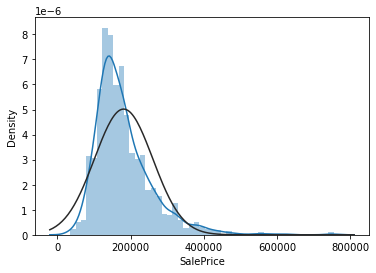

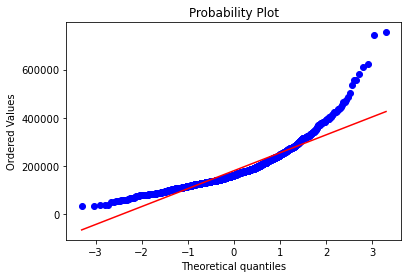

In [13]:
# histogram and probability plot of target variable
sns.distplot(train_df1['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(train_df1['SalePrice'], plot=plt)

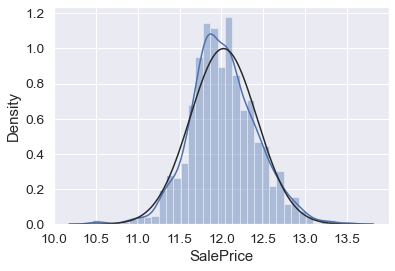

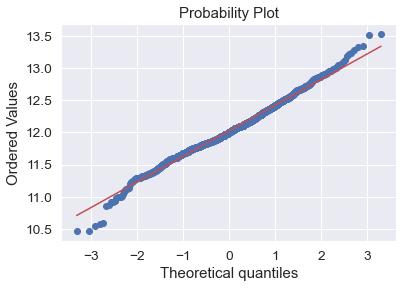

In [60]:
# apply log transformation to target variable to make normally distributed
train_df['SalePrice']=np.log(train_df['SalePrice'])

# check if log transformation improved histogram and prob distribution
sns.distplot(train_df['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(train_df['SalePrice'], plot=plt)

# 4.2 how about distribution of key features? GrLivArea from full_df1

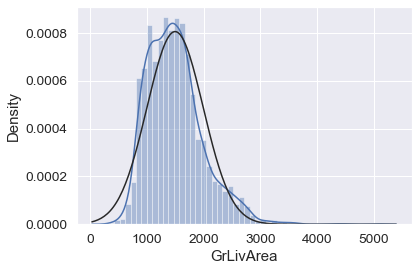

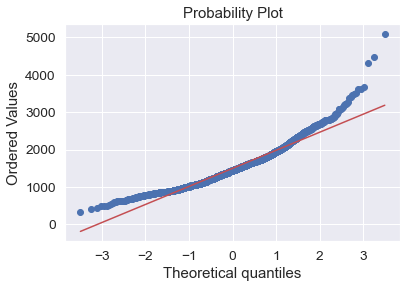

In [61]:
sns.distplot(full_df1['GrLivArea'], fit=norm);
fig=plt.figure()
res=stats.probplot(full_df1['GrLivArea'], plot=plt)

## GrLivArea is not normally distributed, and had positive skewness. So, apply log transformation

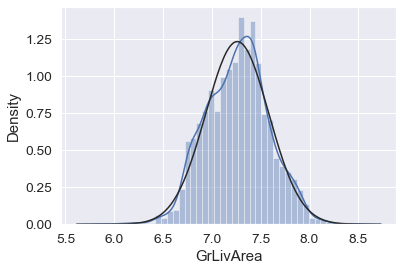

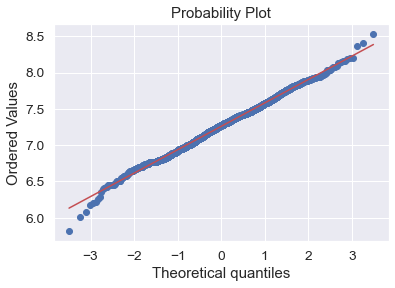

In [62]:
# apply log transformation to variable to make normally distributed
full_df1['GrLivArea'] = np.log(full_df1['GrLivArea'])

# check if log transformation improved histogram and prob distribution
sns.distplot(full_df1['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(full_df1['GrLivArea'], plot=plt)

## Now, GrLivArea is normally distributed

## 4.2.1 how about distribution of key features? GrLivArea from train_df1

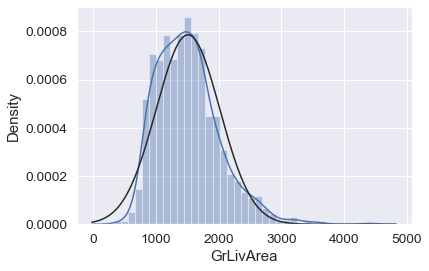

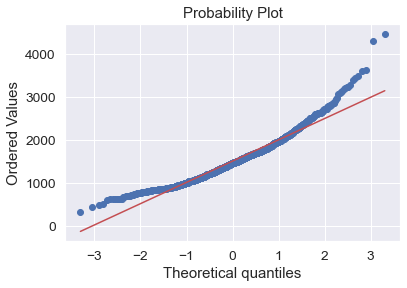

In [63]:
sns.distplot(train_df1['GrLivArea'], fit=norm);
fig=plt.figure()
res=stats.probplot(train_df1['GrLivArea'], plot=plt)

### GrLivArea is not normally distributed, and had positive skewness. So, apply log transformation

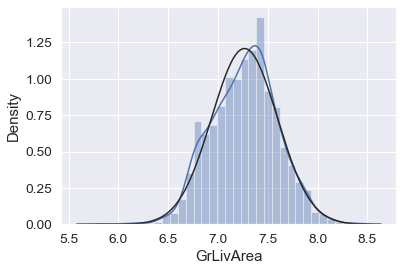

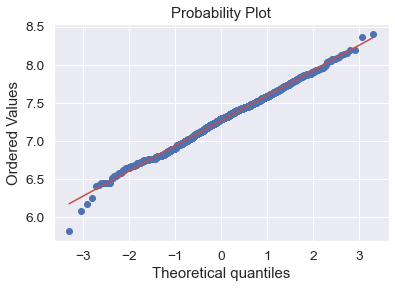

In [64]:
# apply log transformation to variable to make normally distributed
train_df1['GrLivArea'] = np.log(train_df1['GrLivArea'])

# check if log transformation improved histogram and prob distribution
sns.distplot(train_df1['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(train_df1['GrLivArea'], plot=plt)

## 4.3 how about distribution of key features? TotalBsmtSF?

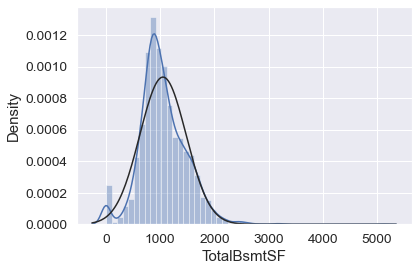

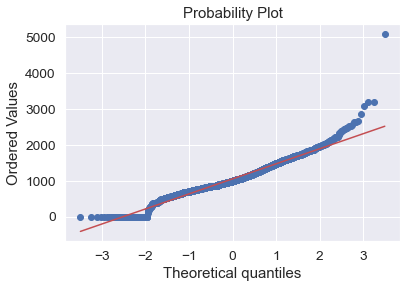

In [65]:
sns.distplot(full_df1['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(full_df1['TotalBsmtSF'], plot=plt)

### TotalBsmtSF is not normally distributed had positive skewness. BUT starts with 0 (houses without basement); 0 doesn't allow log transformation;

In [66]:
full_df1.replace([np.inf, -np.inf], 1, inplace=True)

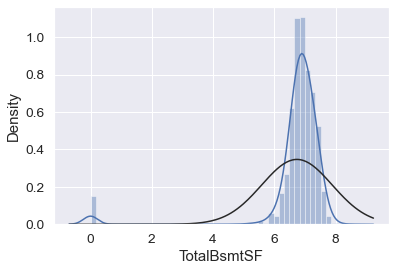

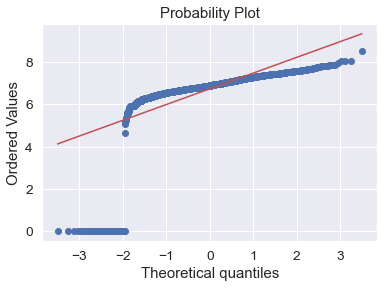

In [67]:
# apply log transformation to variable to make normally distributed
full_df1['TotalBsmtSF']=np.log(full_df1['TotalBsmtSF'])

# check if log transformation improved histogram and prob distribution
sns.distplot(full_df1['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(full_df1['TotalBsmtSF'], plot=plt)

In [68]:
full_df1.TotalBsmtSF.isnull().sum()

0

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

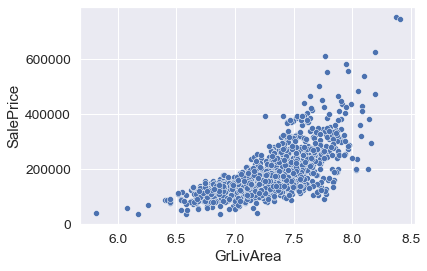

In [69]:
sns.scatterplot(x=train_df1['GrLivArea'], y=train_df1['SalePrice'])

# 4.4 Then handling categorical data of df1

In [70]:
# 3.4 Create dummy variables to categorical variables
dummies=pd.get_dummies(full_df1)
dummies.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,706.0,0.0,150.0,6.752270,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,978.0,0.0,284.0,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,486.0,0.0,434.0,6.824374,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,216.0,0.0,540.0,6.628041,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,655.0,0.0,490.0,7.043160,...,0,0,0,1,0,0,0,0,1,0


In [71]:
#check if column contains infinite value, replaced the +/-inf values into nan's and droped rows with nan's
dummies.replace([np.inf, -np.inf], 1, inplace=True)
dummies.dropna()
dummies.shape

(2902, 223)

In [72]:
# check if any missing values in features after preprocessing
dummies.isnull().sum().sort_values(ascending=False)

Id                       0
Exterior2nd_MetalSd      0
Exterior1st_VinylSd      0
Exterior1st_Wd Sdng      0
Exterior1st_WdShing      0
                        ..
Neighborhood_NridgHt     0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
SaleCondition_Partial    0
Length: 223, dtype: int64

# 4.5 Breaking dummies into train and test datasets

In [73]:
dummies=dummies.sort_values(by='Id')
dummies.head(100)

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,706.0,0.0,150.0,6.752270,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,978.0,0.0,284.0,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,486.0,0.0,434.0,6.824374,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,216.0,0.0,540.0,6.628041,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,655.0,0.0,490.0,7.043160,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,9765,6,8,1993,1993,310.0,0.0,370.0,6.522093,...,0,0,0,1,0,0,0,0,1,0
96,97,10264,7,5,1999,1999,1162.0,0.0,426.0,7.370231,...,0,0,0,1,0,0,0,0,1,0
97,98,10921,4,5,1965,1965,520.0,0.0,440.0,6.866933,...,0,0,0,1,0,0,0,0,1,0
98,99,10625,5,5,1920,1950,108.0,0.0,350.0,6.126869,...,0,0,0,0,1,0,0,0,0,0


In [74]:
count = np.isinf(dummies).values.sum()
count

0

In [75]:
train_data_ML=dummies.loc[dummies.Id<=1460]
train_data_ML.tail()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,1456,7917,6,5,1999,2000,0.0,0.0,953.0,6.859615,...,0,0,0,1,0,0,0,0,1,0
1456,1457,13175,6,6,1978,1988,790.0,163.0,589.0,7.340836,...,0,0,0,1,0,0,0,0,1,0
1457,1458,9042,7,9,1941,2006,275.0,0.0,877.0,7.049255,...,0,0,0,1,0,0,0,0,1,0
1458,1459,9717,5,6,1950,1996,49.0,1029.0,0.0,6.982863,...,0,0,0,1,0,0,0,0,1,0
1459,1460,9937,5,6,1965,1965,830.0,290.0,136.0,7.135687,...,0,0,0,1,0,0,0,0,1,0


# 4.6 Establish test dataset, test numpy array for ML models

In [76]:
test_data_ML=dummies.loc[dummies.Id>=1461]
test_data_ML.head(5)

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,11622,5,6,1961,1961,468.0,144.0,270.0,6.782192,...,0,0,0,1,0,0,0,0,1,0
1,1462,14267,6,6,1958,1958,923.0,0.0,406.0,7.192182,...,0,0,0,1,0,0,0,0,1,0
2,1463,13830,5,5,1997,1998,791.0,0.0,137.0,6.833032,...,0,0,0,1,0,0,0,0,1,0
3,1464,9978,6,6,1998,1998,602.0,0.0,324.0,6.830874,...,0,0,0,1,0,0,0,0,1,0
4,1465,5005,8,5,1992,1992,263.0,0.0,1017.0,7.154615,...,0,0,0,1,0,0,0,0,1,0


In [77]:
test_array=test_data_ML.values
print(test_array[:20])

[[1.4610e+03 1.1622e+04 5.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4620e+03 1.4267e+04 6.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4630e+03 1.3830e+04 5.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.4780e+03 1.1520e+04 9.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4790e+03 1.4122e+04 8.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4800e+03 1.4300e+04 9.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]]


In [78]:
print(dummies.shape)
print(train_data_ML.shape)
print(test_data_ML.shape)
print(test_array.shape)

(2902, 223)
(1457, 223)
(1445, 223)
(1445, 223)


## Adding log transformed SalePrice col from target to train_df1_ML

In [79]:
train_data=pd.merge(train_data_ML, target, on='Id')
train_data.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,8450,7,5,2003,2003,706.0,0.0,150.0,6.752270,...,0,0,1,0,0,0,0,1,0,12.247694
1,2,9600,6,8,1976,1976,978.0,0.0,284.0,7.140453,...,0,0,1,0,0,0,0,1,0,12.109011
2,3,11250,7,5,2001,2002,486.0,0.0,434.0,6.824374,...,0,0,1,0,0,0,0,1,0,12.317167
3,4,9550,7,5,1915,1970,216.0,0.0,540.0,6.628041,...,0,0,1,1,0,0,0,0,0,11.849398
4,5,14260,8,5,2000,2000,655.0,0.0,490.0,7.043160,...,0,0,1,0,0,0,0,1,0,12.429216


In [80]:
train_data.shape

(1457, 224)

# 5. Train Model
## 5.1 Separating features (X) and target variable (y)

# split train_data into X, y

In [132]:
X= train_data.iloc[:,:-1].values
y= train_data['SalePrice'].values

In [133]:
X.shape

(1457, 223)

In [134]:
y.shape

(1457,)

# 5.2 Train, Test, split data

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 223)
(438, 223)
(1019,)
(438,)


# 5.3 Feature Scaling

In [136]:
scaling=MinMaxScaler(feature_range=(0,1))
X_train=scaling.fit_transform(X_train) # Fit and transform MinMaxScaler to X_train
X_test=scaling.transform(X_test) # trainform scaling to X_test
test_array=scaling.transform(test_array) # transform MinMaxScaler to test_array

# 5.4.1 Multiple Linear Regression model
y= a1x1 + a2x2 + a3x3+....+b (linear reg minimizes a loss function (OLS) while choosing coefficients for fitting the model in sklearn.

In [137]:
# instantiate linearregression
lr=LinearRegression()
# fit leniar regression on training data
lr.fit(X_train, y_train)
# predict on training data
y_trpred=lr.predict(X_train)
# predict on test data
y_pred=lr.predict(X_test)

print('R^2: {}'.format(lr.score(X_test, y_test)))
      
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

R^2: -2.086582611147246e+19
Root Mean Square Error: 1798182997.8308873


In [138]:
y_pred[:10]

array([11.84794617, 11.96299744, 11.49328613, 11.81642151, 12.62060547,
       11.92445374, 12.06211853, 11.75413513, 11.8815155 , 12.21882629])

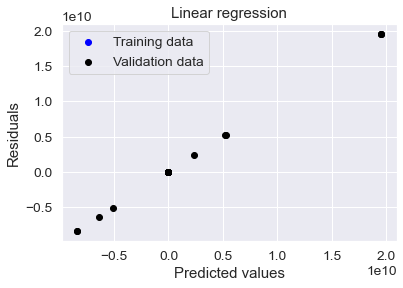

In [139]:
#plot between predicted values and residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

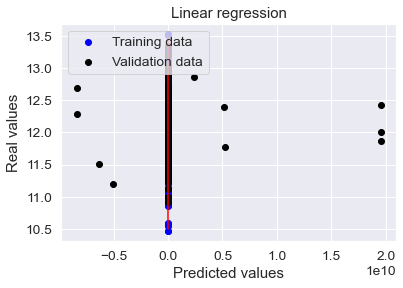

In [140]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 5.4.2 Five fold cross validation
Cross-validation is a vital step in evaluating a model.

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
# compute 5-fold cross-val scores
cv_scores=cross_val_score(lr, X, y, cv=5)

print("5-fold cross val scores (i.e R^2 values):{}". format(cv_scores))
print('Mean cross val score or mean R^2 value: {}'.format(np.mean(cv_scores)))

5-fold cross val scores (i.e R^2 values):[0.9135202  0.90553475 0.90291703 0.9142619  0.90926279]
Mean cross val score or mean R^2 value: 0.9090993339966594


### Large coefficients can lead to overfitting of Linear Regression; So, Regularization can penalize overfitting by handling colinearity.

# 5.5 Ridge Regression
Parameter is alpha like k in KNN (alpha=0 leads to overfitting, very high alpha leads to underfitting)

In [142]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha',alpha)

# predict on training data
y_trpred=ridge.predict(X_train)
# predict on test data
y_pred=ridge.predict(X_test)
print('R^2 value:{}'.format(ridge.score(X_test, y_test)))
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

Best alpha 1.0
R^2 value:0.9273166815568039
Root Mean Square Error: 0.1061288525605785


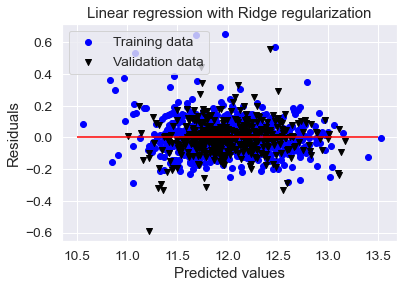

In [143]:
# Plot residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

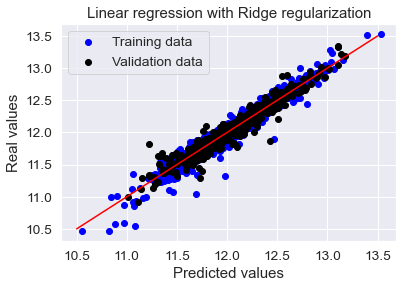

In [144]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 5.6 Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0005, normalize=True)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print('R^2 value:{}'.format(lasso.score(X_test, y_test)))

R^2 value:0.9137602370948436


# 5.7 Predictions

In [98]:
test_data_ML.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,11622,5,6,1961,1961,468.0,144.0,270.0,6.782192,...,0,0,0,1,0,0,0,0,1,0
1,1462,14267,6,6,1958,1958,923.0,0.0,406.0,7.192182,...,0,0,0,1,0,0,0,0,1,0
2,1463,13830,5,5,1997,1998,791.0,0.0,137.0,6.833032,...,0,0,0,1,0,0,0,0,1,0
3,1464,9978,6,6,1998,1998,602.0,0.0,324.0,6.830874,...,0,0,0,1,0,0,0,0,1,0
4,1465,5005,8,5,1992,1992,263.0,0.0,1017.0,7.154615,...,0,0,0,1,0,0,0,0,1,0


In [99]:
test_array[:10]

array([[ 4.70419106e-07, -7.74285520e-03, -6.17283951e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 9.40838212e-07, -7.74279732e-03, -4.93827160e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.41125732e-06, -7.74280688e-03, -6.17283951e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.76335285e-06, -7.74292567e-03, -4.93827160e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.23377195e-06, -7.74288684e-03, -3.70370370e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.70419106e-06, -7.74292571e-03, -7.40740741e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [100]:
#predictied values
new_pred=ridge.predict(test_array)
new_pred

array([10.10042614, 10.18948956, 10.25785222, ..., 10.15313705,
       10.16047553, 10.31042482])

In [101]:
# predicted values dataframe
predicted_data=pd.DataFrame({'Id':test_data_ML['Id'],
                            'SalePrice_Predicted':new_pred})
predicted_data

,Id,SalePrice_Predicted
0,1461,10.100426
1,1462,10.189490
2,1463,10.257852
3,1464,10.297924
4,1465,10.374143
...,...,...
1454,2915,9.892595
1455,2916,9.839658
1456,2917,10.153137
1457,2918,10.160476


In [103]:
# convert predicted values to exponential, make dataframe
predicted_data=pd.DataFrame({'Id':test_data_ML['Id'],
                            'SalePrice_Predicted':np.exp(new_pred)})
predicted_data


,Id,SalePrice_Predicted
0,1461,24353.385188
1,1462,26621.902542
2,1463,28505.496991
3,1464,29670.947743
4,1465,32020.879152
...,...,...
1454,2915,19783.334339
1455,2916,18763.302922
1456,2917,25671.508709
1457,2918,25860.591735


<AxesSubplot:xlabel='SalePrice_Predicted', ylabel='Count'>

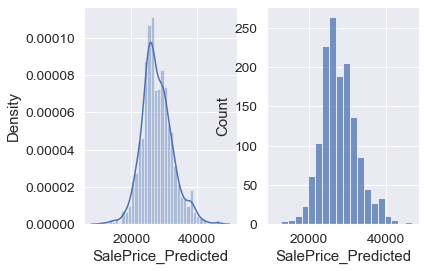

In [104]:
fig, ax =plt.subplots(1,2)
sns.distplot(predicted_data.SalePrice_Predicted, kde=True, ax=ax[0])
sns.histplot(predicted_data.SalePrice_Predicted, bins=20, ax=ax[1])

In [105]:
predicted_data.to_csv('Test_data_predicted_saleprice.csv')

In [ ]:
Preprocessing summary:
    - Target feature is not normally distributed and had positive skewness, so log transofrmation is applied to SalePrice from combined df and train dataset. Similarly log trinaformation applied to GrLivArea and TotalBsmtSF features.
    - Then, created dummies for categorical features from combined df and sorted data by Id. 
    - Preprocessed dataset is sliced into train and test datasets by Id<=1460 and >1460 respectively. Added log transformed SalePrice column to Train dataset.
    - From train dataset sliced features (X) and target (y). 
    - Applied train_test_split on X, y to slice 30% of data for validating the ML model. 
    - Then, fit MinMaxScaler to X_train and applied/transformed scaling to X_test and test_array (to be predicted dataset).

ML Models:
    - Since target variable is continuous and had several features, Multiple Linear Regression (MLR) is fitted on train set from X and y features. Then, predicted the validation or test set (30% sliced data kept aside fromt train set). The R2 value between observed (y_test) and predicted (y_pred) is R^2: -2.086582611147246e+19
Root Mean Square Error: 1798182997.8308873; these values seems to be odd
    - Then, applied five fold cross validation to Linear Regression model resulted positive R2 values, but large coefficients can lead to overfitting LR. So, regulation is applied to penalize the overfitting.
    - Ridge regression with varied alpha parameters is fit on train set of X & Y features and determind best alpha (1.0). R2 value:0.9273166815568039, Root Mean Square Error: 0.1061288525605785; very positive values. Besides, strong linear relationship is noted in plot between predicted vs real values. 
NOTE: Since Ridge Regression R^2 value is so good, it seems to like perhaps this data simply requires the regularization step (part of Ridge but not the original Linear Regression)      
    - Similarly, positive R^2 value is found between observed vs predicted values of validation set with Lasso regression.
    
    As Ridge regression had higher R^2 value, used it for predicting the SalePrice of houses from test.csv dataset. Plotting of Sale price showed normal distribution.
    
Conclusion and Next steps: 
    Ridge Regression predicted SalePrice of the houses. In next steps based on the business priority, we can figure out what features are driving the higher price and focus on mentioning those features while listing the houses in the market, also train real estage agents to expain those features effecitvely to customers.